In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, ReLU, LeakyReLU, BatchNormalization, MaxPooling2D, Dropout
import np_utils # (For one hot(to_catagorial))

In [2]:
# declaring features and label holders
features_m_3 = []
labels_m_3 = []
size = (128, 128) # We will resize the feature to size so each feature is 

In [3]:
path_to_cats = '../database/PetImages/Cat/'
path_to_dogs = '../database/PetImages/Dog/'

def data_preprocessing(folder, label):
    files = os.listdir(folder) #files now  contains all the images found in'folder'
    for file in files:
        img = cv2.imread(folder+file)
        if img is not None: # if the file is not empty
            img = cv2.resize(img, dsize = size)
            features_m_3.append(img)
            labels_m_3.append(label)

data_preprocessing(path_to_cats, 0) # we are setting label 0 for cats and 1 for dogs
data_preprocessing(path_to_dogs, 1)

24913 24913


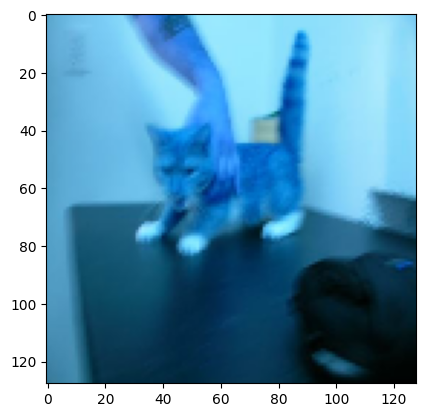

In [4]:
print(len(features_m_3), len(labels_m_3))

plt.imshow(features_m_3[0])

In [5]:
features_tmp = features_m_3
labels_tmp = labels_m_3
features_np = np.array(features_tmp).astype(np.float32)
labels_np = np.array(labels_tmp).astype(np.float32)

Text(0.5, 1.0, '0.0')

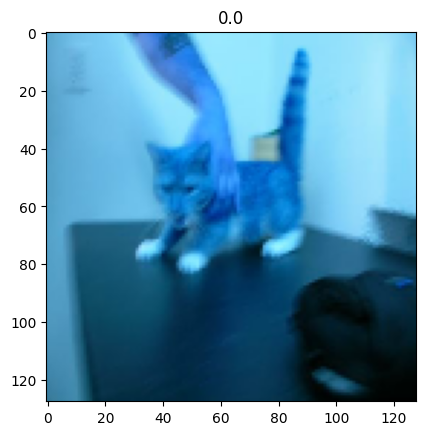

In [6]:
features_normalized = features_np/255

#visualization
img = features_normalized[0]
img.shape , plt.imshow(img)
plt.title(labels_np[0])

Text(0.5, 1.0, 'Dog')

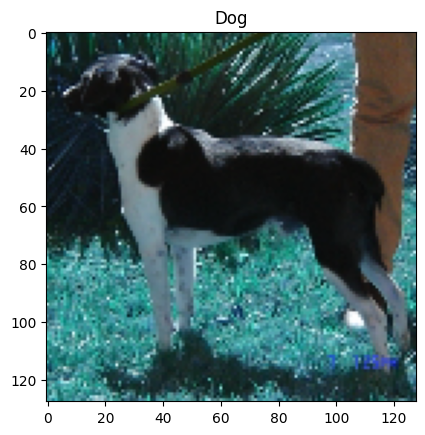

In [7]:
#visualization
index = np.random.randint(0, len(features_normalized))
img = features_normalized[index]
label = labels_np[index]
if label == 0:
    title = "Cat"
elif label == 1:
    title = "Dog"
plt.imshow(img)
plt.title(title)

In [8]:
def random_sample(features, labels):
    index = np.random.randint(0, len(features))
    img = features[index]
    label = labels[index]
    
    assert labels.ndim == 1
    if label == 0:
        title = "Cat"
    else:
        title = "Dog"
        
    plt.imshow(img)
    plt.title(title)

In [9]:
train_features_m, test_features_m, train_labels_m, test_labels_m = train_test_split(features_normalized, labels_np, test_size = 0.2)

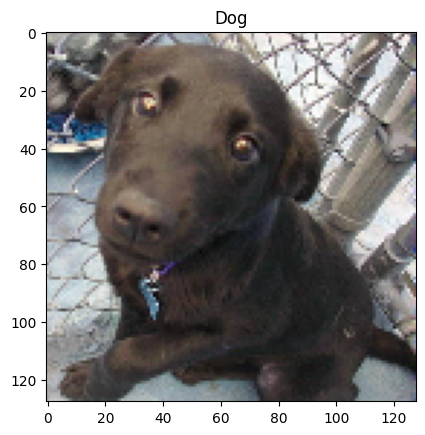

In [10]:
random_sample(train_features_m, train_labels_m)

In [11]:
from keras.utils import to_categorical

train_labels_onehot = to_categorical(train_labels_m)
test_labels_onehot = to_categorical(test_labels_m)

In [12]:
path = '../kaggle/working/'

np.save(path + 'train_features_load.npy', train_features_m)
np.save(path + 'train_labels_load.npy', train_labels_onehot)

np.save(path+ 'test_features_load.npy', test_features_m)
np.save(path + 'test_labels_load', test_labels_onehot)

In [13]:
train_features = np.load('../kaggle/working/train_features_load.npy')
test_features = np.load('../kaggle/working/test_features_load.npy')
train_labels = np.load('../kaggle/working/train_labels_load.npy')
test_labels = np.load('../kaggle/working/test_labels_load.npy')

In [ ]:
def cnn_alex(input_shape, num_classes):
    tf.random.set_seed(42)
    model = Sequential()
    
#     model.add(Input(input_shape = (128, 128, 3))),
    model.add(Conv2D(96, input_shape = input_shape, kernel_size=(11,11), strides=(4,4), activation = 'relu')),
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides =(2,2))),
    model.add(Conv2D(256, kernel_size=(5,5), padding='same', activation = 'relu')),
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))),
    
    model.add(Conv2D(384, kernel_size=(3,3),padding='same', activation = 'relu')),
    model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation = 'relu')),
    model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation = 'relu')),
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))),
    
    
    model.add(Flatten()),
    model.add(Dense(4096, activation = 'relu')),
    model.add(Dropout(rate = 0.5)),
    model.add(Dense(4096, activation = 'relu')),
    model.add(Dropout(rate = 0.5)),
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ['accuracy'])
    return model

: 

In [ ]:
# N = 1000
# train_features_tmp = train_features[:N]
# train_labels_tmp = train_labels[:N]
train_features_tmp = train_features
train_labels_tmp = train_labels

input_shape = train_features_tmp[0].shape
model_alex = cnn_alex(input_shape, 2)
model_alex.summary()
history_cnn_alex = model_alex.fit(train_features_tmp, train_labels_tmp, epochs = 4, batch_size = 64, validation_split = 0.1)

: 

: 